In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
X1 = np.random.randint(10,20,(25,1))
Y1 = np.random.randint(25,50,(25,1))
Z1 = np.hstack((X1,Y1))
X2 = np.random.randint(25,50,(25,1))
Y2 = np.random.randint(10,70,(25,1))
Z2 = np.hstack((X2,Y2))
X3 = np.random.randint(55,60,(25,1))
Y3 = np.random.randint(0,10,(25,1))
Z3 = np.hstack((X3,Y3))
X4 = np.random.randint(40,60,(25,1))
Y4 = np.random.randint(40,60,(25,1))
Z4 = np.hstack((X4,Y4))


Z = np.vstack((Z1,Z2,Z3,Z4))#acomodamos verticalmente los arreglos dados
# convert to np.float32
Z = np.float32(Z)

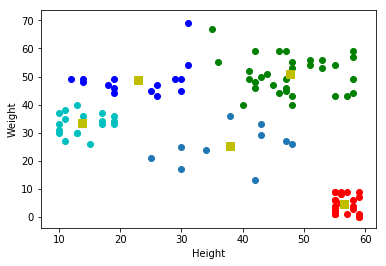

In [6]:
K=5

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)#criterio de paro, cuando se alcanze un error
#debajo de epsilon o cuando se alcanze manximas iteraciones, numero de iteraciones, valor epsilon
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)#ejecutamos k means sobre nuestros puntos
#buscamos separarlos en K clases, con los criterios de paro, se hace esto 10 veces y se regresa el mejor intento, se
#inicializan los centroides al azar
# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]
C = Z[label.ravel()==2]
D = Z[label.ravel()==3]
E = Z[label.ravel()==4]
F = Z[label.ravel()==5]
G = Z[label.ravel()==6]
# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(C[:,0],C[:,1],c = 'g')
plt.scatter(D[:,0],D[:,1],c = 'b')
plt.scatter(E[:,0],E[:,1],c = 'c')
plt.scatter(F[:,0],F[:,1],c = 'm')
plt.scatter(G[:,0],G[:,1],c = 'y')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

In [7]:
#Practica abajo se cargan de un archivo de datos numpy que contiene un grupo de puntos NO clasificados
# utiliza K-means para agruparlos adecuadamente
#Luego utiliza KNN para agregar los puntos Z a sus clases correspondientes
with np.load('datosKMeans.npz') as L:
            puntos,Z=\
            [L[i] for i in ('puntos','Z')]

#np.savez('datosKMeans',puntos=puntos, Z=Z)

In [10]:
ret,label,center=cv2.kmeans(puntos,4,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)#ejecutamos k means sobre nuestros puntos

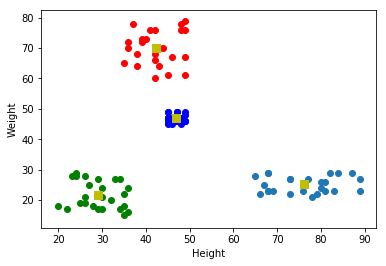

In [11]:
A = puntos[label.ravel()==0]
B = puntos[label.ravel()==1]
C = puntos[label.ravel()==2]
D = puntos[label.ravel()==3]
E = puntos[label.ravel()==4]
F = puntos[label.ravel()==5]
G = puntos[label.ravel()==6]
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(C[:,0],C[:,1],c = 'g')
plt.scatter(D[:,0],D[:,1],c = 'b')
plt.scatter(E[:,0],E[:,1],c = 'c')
plt.scatter(F[:,0],F[:,1],c = 'm')
plt.scatter(G[:,0],G[:,1],c = 'y')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()